<a href="https://colab.research.google.com/github/Sushant1805/DL-Assignments/blob/main/NLP_Lab_Assignmnent_4_Sushant_Bhosale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -NLP

**Course Name:** [Enter Course Name]

**Lab Title:** NLP Techniques for Text Classification

**Student Name:**[Enter Your Name]

**Student ID:**[Enter Your ID]

**Date of Submission:** [Enter Date]

**Group Members**: [Enter Names]


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [ ]:
#Code for Part 1

In [73]:
# If downloading from a URL (example with IMDB dataset)
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

--2025-04-14 20:36:46--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  30.4MB/s    in 2.6s    

2025-04-14 20:36:49 (30.4 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [74]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups  # Example dataset if you don't have one

# Load dataset (example with 20 Newsgroups)
data = fetch_20newsgroups(subset='all')
df = pd.DataFrame({'text': data.data, 'label': data.target})

# Explore the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nLabel distribution:")
print(df['label'].value_counts())
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

Dataset shape: (18846, 2)

First few rows:
                                                text  label
0  From: Mamatha Devineni Ratnam <mr47+@andrew.cm...     10
1  From: mblawson@midway.ecn.uoknor.edu (Matthew ...      3
2  From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...     17
3  From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...      3
4  From: Alexander Samuel McDiarmid <am2o+@andrew...      4

Label distribution:
label
10    999
15    997
8     996
9     994
11    991
7     990
13    990
5     988
14    987
2     985
12    984
3     982
6     975
1     973
4     963
17    940
16    910
0     799
18    775
19    628
Name: count, dtype: int64

Missing values:
text     0
label    0
dtype: int64

Data types:
text     object
label     int64
dtype: object


In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Download all required NLTK data (including punkt_tab)
nltk.download('all')

# Initialize tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    try:
        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenization
        tokens = word_tokenize(text)

        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words and word.isalpha()]  # Keep only alphabetic tokens

        # Stemming
        stemmed = [stemmer.stem(word) for word in tokens]

        # Lemmatization
        lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]

        return ' '.join(lemmatized)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

# Apply preprocessing with error handling
df['processed_text'] = df['text'].apply(preprocess_text)

# Verify processing worked
print("\nOriginal text sample:")
print(df['text'].iloc[0][:200])
print("\nProcessed text sample:")
print(df['processed_text'].iloc[0][:200])

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root


Original text sample:
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sur

Processed text sample:
mamatha devineni ratnam subject pen fan reaction organ post offic carnegi mellon pittsburgh pa line nntppostinghost sure basher pen fan pretti confus lack kind post recent pen massacr devil actual bit


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_count = count_vectorizer.fit_transform(df['processed_text'])

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

print("\nCount Vectorizer shape:", X_count.shape)
print("TF-IDF Vectorizer shape:", X_tfidf.shape)
print("\nCount Vectorizer sample:")
print(X_count[0].toarray())
print("\nTF-IDF Vectorizer sample:")
print(X_tfidf[0].toarray())


Count Vectorizer shape: (18846, 5000)
TF-IDF Vectorizer shape: (18846, 5000)

Count Vectorizer sample:
[[0 0 0 ... 0 0 0]]

TF-IDF Vectorizer sample:
[[0. 0. 0. ... 0. 0. 0.]]


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

In [79]:
from sklearn.model_selection import train_test_split

# Split the data (assuming you've already done preprocessing and vectorization)
X = X_tfidf  # or X_count if you prefer CountVectorizer
y = df['label']  # make sure this is your target column

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # maintains class distribution in splits
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 15076 samples
Test set size: 3770 samples


In [80]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

In [81]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

Evaluation Metrics:
Accuracy: 0.8199
Precision (macro): 0.8268
Recall (macro): 0.8111
F1-Score (macro): 0.8128

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       160
           1       0.67      0.78      0.72       195
           2       0.76      0.79      0.77       197
           3       0.67      0.73      0.70       196
           4       0.89      0.81      0.85       193
           5       0.83      0.75      0.79       198
           6       0.82      0.81      0.81       195
           7       0.79      0.83      0.81       198
           8       0.89      0.79      0.84       199
           9       0.82      0.88      0.85       199
          10       0.93      0.93      0.93       200
          11       0.94      0.95      0.94       198
          12       0.71      0.73      0.72       197
          13       0.82      0.88      0.85       198
          14       0.89      0.94      0.92       197


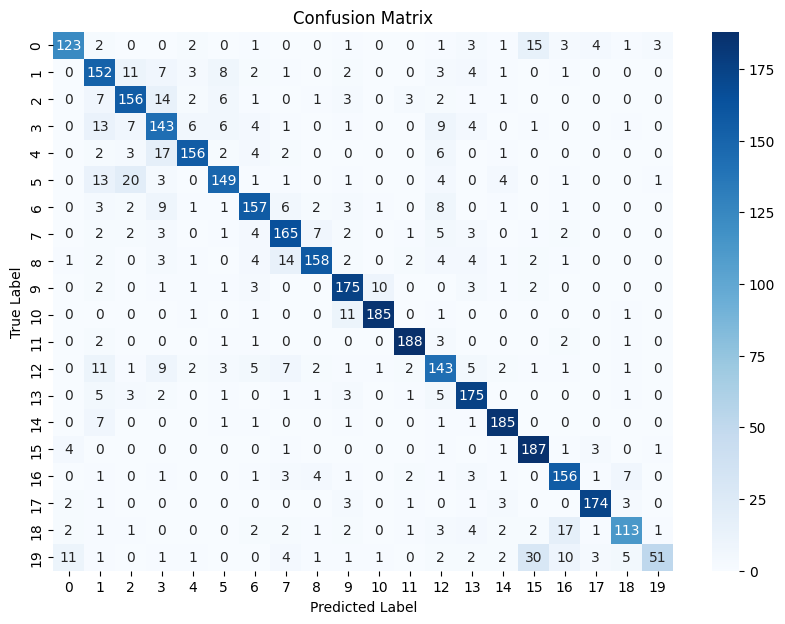

In [83]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred):
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall (macro): {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1-Score (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate the model
evaluate_model(y_test, y_pred)

**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, [Your Name], confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: [Full Name]

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion